# profit_calculator
This script provides simulated performance for investment strategies that are based on the measured stock-weather correlations

In [77]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Model the cumulative benefit of trading on good weather in a flat-market scenario 
### a function that returns relative profit

In [78]:
def niave_profit(spread, bad_day_frac, n_years):
    """
    Input: 
        - the spread between good days and all days
        - the faction of bad days (assumes weather autocorrelation is zero)
        - the number of years an investor uses the strategy
    Returns: total profit
    """
    investment = 1.0
    total = investment
    invested = False
    days = int(n_years*251)
    for i in range(days):    
        random.seed(i)
        r = random.random()
        #buy on the bad days, if not invested
        if( (r<bad_day_frac) & (not invested)):
            invested = True
            
        #sell on the good days, if invested
        if((r>bad_day_frac) & (invested)):
            total = total*(1 + spread)
            invested = False
    profit = (total - investment)*100.0/investment
    return profit

### setup and call the function for various investing periods, storing the results

In [79]:
#spread is difference between mean gains good weather and all days
spread = (0.0667 - 0.0298)/100.0 
#assume good weather occurs 25% of the time
bad_day_frac = 0.5
#set trading
maxyears = 40
years  = np.arange(maxyears)
profits = np.zeros(maxyears)
profits2 = np.zeros(maxyears)
for y in years:
    profits[y] = niave_profit(spread,bad_day_frac,y)

### plot the results

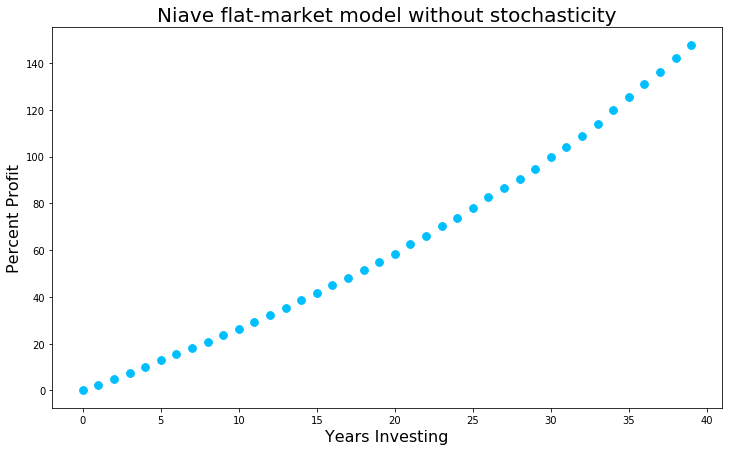

In [80]:
plt.figure(figsize=(12, 7))
plt.title("Niave flat-market model without stochasticity",fontsize=20)
plt.ylabel('Percent Profit',fontsize=16)
plt.xlabel("Years Investing",fontsize=16)
p = plt.scatter(years, profits, label='new good weather',c='deepskyblue',marker='o',s=60)
# plt.scatter(years, profits2, label='new good weather',c='black',marker='o',s=60)

## A more realistic model (in progress...)

In [81]:
import random
def investment_simulator(n_years,bad_day_frac=0.5):

    if(n_years ==0):
        return 0
    
    #there are 251 trading days per year
    n_days = int(n_years*251)
    
    
    #get randomly generated days of good or bad weather
    good_weather = np.zeros(n_days+1, dtype=bool)
    days  = np.arange(n_days+1)
    for d in days:
        random.seed(d)
        r = random.random()
        if r>bad_day_frac:
            good_weather[d] = True
     
    #investment straegyL
    days  = np.arange(n_days)
    invested = False #start uninvested
    total = 1 #start with  initial capital of 1
    for d in days:
        
        #do nothing if today and tomorrow are bad
        if (not good_weather[d] and not good_weather[d+1]) :
            pass
        
        #buy on the bad days if tomrrow is good and 
        if (not good_weather[d] and not good_weather[d+1] and not invested) :
            #by def, the gain/loss in the buy is zero, at first
            #you can modify this to a positive number to introduce brokers fees
            buy = 0
            invested = True
            
        #if today and tomorrow are good weather stay invested (realize gains then reinvest)
        if (good_weather[d] and good_weather[d+1] and invested):
            #the gain today is randomly pulled from the histogram of price movements of good days
            sell = df_clean_good['PercentChange'].sample(n=1,).values[0]
#             sell = 1.0
            gain = sell - buy
            total = total*(1.0+gain)
            
        #sell on good days, if tomrrow is bad
        if (good_weather[d] and not good_weather[d+1] and invested) :
            sell = df_clean_good['PercentChange'].sample(n=1,).values[0]
#             sell = 1.0
            gain = sell - buy
            total = total*(1.0+gain)
            invested = False
        print(total)
    return total

## Random Tests

In [85]:
def test_sim(spread, bad_day_frac, n_years):
    investment = 1.0
    total = investment
    invested = False
    days = int(n_years*251)
    
    for i in range(days):    
        random.seed(i)
        r = random.random()
#         print('day',i)
        #buy on the bad days, if not invested
        if( (r<bad_day_frac) & (not invested)):
            #buy action
            invested = True
#             print("buy!")
        
        #sell on the good days, if invested
        if((r>bad_day_frac) & (invested)):
            #sell actions
            total = total*(1 + spread)
            invested = False
#             print("sell!")
#         print("total=",total,'\n')
        
    profit = (total - investment)*100.0/investment
    return profit

In [84]:
days = 1000
daily_gain = 0.5
total = 1
for i in range(days):  
    r = random.random()
    if (r > 0.1):
        movement = daily_gain
    else: 
        movement = -daily_gain
    total = total*(1+movement)
#     print(total)